# **[필수과제2]**

- 정규분포와 비슷하지 않은 컬럼 추가
- 기존 데이터 df casual, cnt,[정규분포와 비슷하지 않은 추가컬럼을 box-cox 등으로 변환] 을 통해서 - r2, rmse, 확인
- 해당 컬럼을 box-cox, yeo-johnson을 통해 변환, 실제 값 계산

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [3]:
df_bs = df.dropna()
df_bs

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174.0,746.0,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440.0,573.0,1013
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


<Axes: xlabel='cnt', ylabel='Density'>

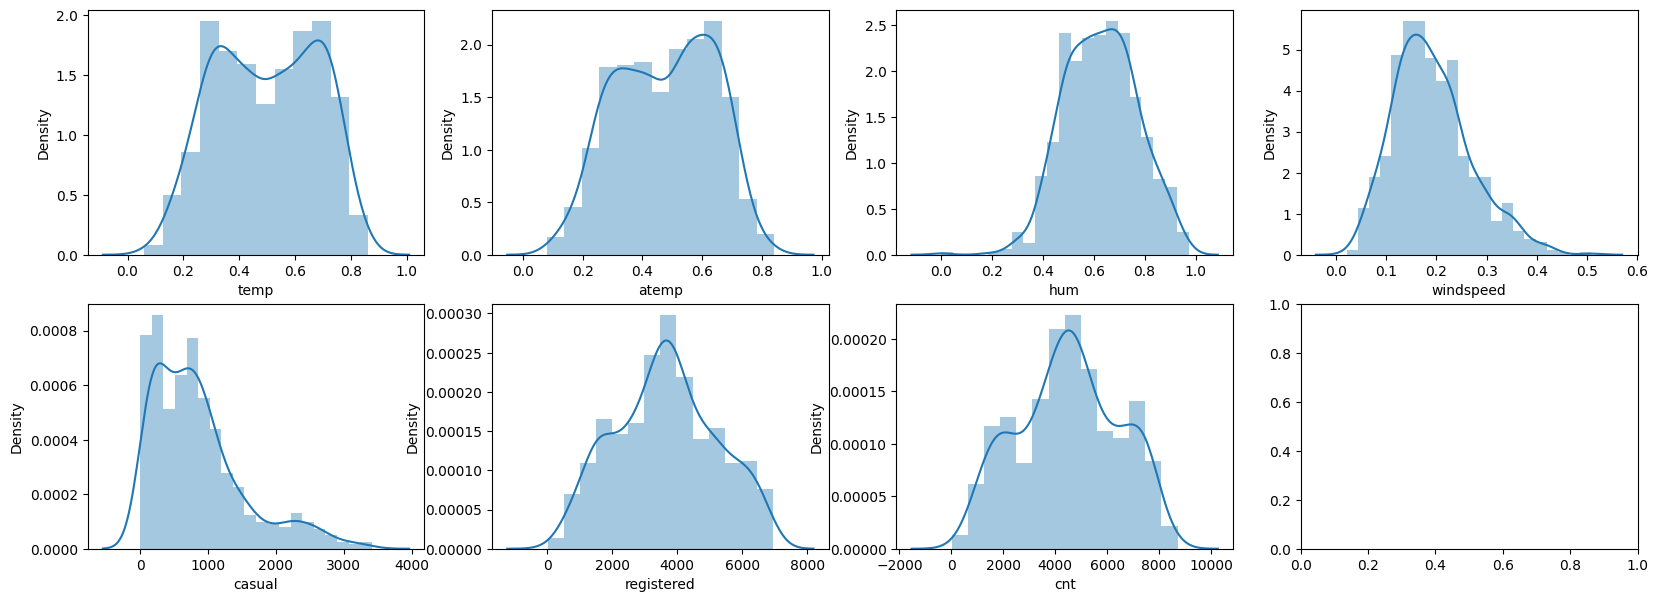

In [4]:
fig, axs = plt.subplots(2,4, figsize=(20,7))
sns.distplot(df['temp'], ax=axs[0, 0])
sns.distplot(df['atemp'], ax=axs[0, 1])
sns.distplot(df['hum'], ax=axs[0, 2])
sns.distplot(df['windspeed'], ax=axs[0, 3])
sns.distplot(df['casual'], ax=axs[1, 0])
sns.distplot(df['registered'], ax=axs[1, 1])
sns.distplot(df['cnt'], ax=axs[1, 2])

### 각 컬럼의 정규분포와 가까운 정도 확인

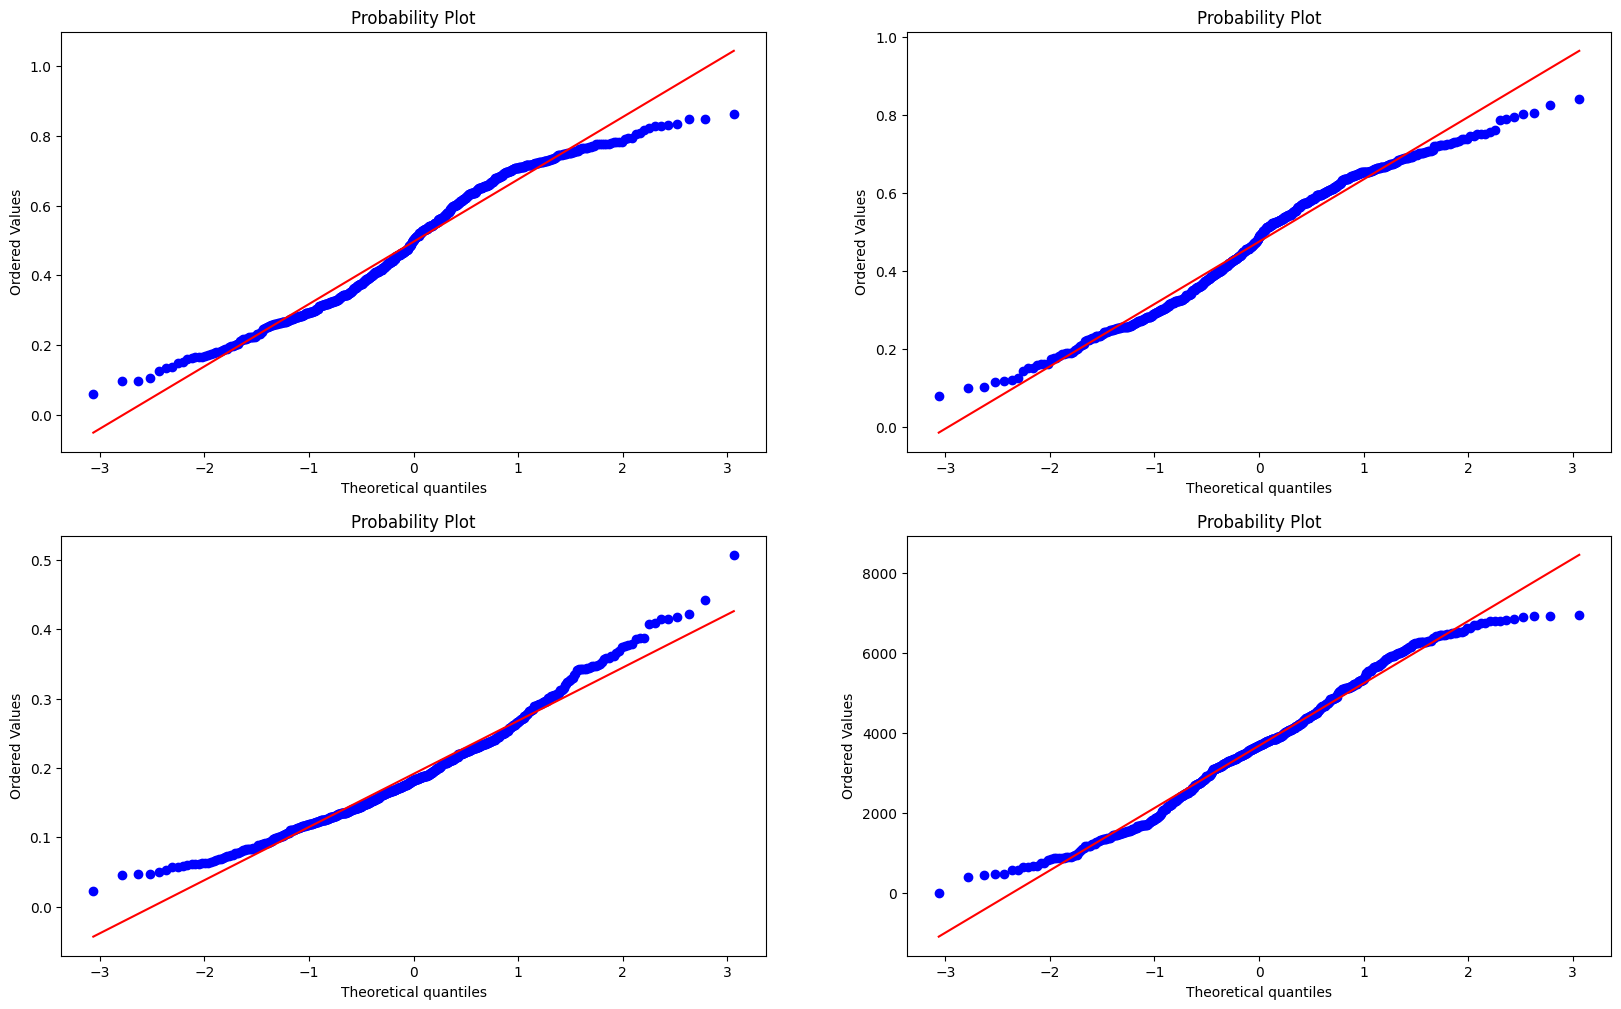

In [5]:
import scipy.stats as stats

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
stats.probplot(df_bs['temp'], dist=stats.norm, plot=axs[0, 0])
stats.probplot(df_bs['atemp'], dist=stats.norm, plot=axs[0, 1])
stats.probplot(df_bs['windspeed'], dist=stats.norm, plot=axs[1, 0])
stats.probplot(df_bs['registered'], dist=stats.norm, plot=axs[1, 1])
plt.show()

In [6]:
from scipy.stats import shapiro

n_normal = None
n_p = 1  # 초기값 1로 설정, 가장 낮은 p-value 찾기

for column in ['temp', 'atemp', 'windspeed', 'registered']:
    # Shapiro 검정 수행
    stat, p = shapiro(df_bs[column])

    if p < n_p:
        n_normal = column
        n_p = p

print("가장 정규분포에 가깝지 않은 컬럼:", n_normal)

가장 정규분포에 가깝지 않은 컬럼: temp


### 정규분포와 비슷하지 않은 컬럼(temp) 원본으로 성능 확인

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

df_bs_sp = df[['casual','temp','cnt']].dropna()
df_bs_sp

,casual,temp,cnt
0,331.0,0.344167,985
1,131.0,0.363478,801
2,120.0,0.196364,1349
3,108.0,0.200000,1562
4,82.0,0.226957,1600
...,...,...,...
725,9.0,0.243333,441
726,247.0,0.254167,2114
727,644.0,0.253333,3095
728,159.0,0.253333,1341


In [8]:
df_X = np.array(df_bs_sp[['casual','temp']])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_sp['cnt'], test_size=0.3, random_state=111)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [9]:
rmse_bf = sqrt(mean_squared_error(y_test, y_pred))
rmse_bf

1295.6445285013363

In [10]:
df_bs_sp.corr()

,casual,temp,cnt
casual,1.000000,0.539502,0.671737
temp,0.539502,1.000000,0.625058
cnt,0.671737,0.625058,1.000000


In [11]:
X_bf = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs_sp['cnt'], X_bf).fit()
summary_bf = model_ols.summary()
summary_bf

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     425.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          8.78e-122
Time:                        05:50:33   Log-Likelihood:                -6046.1
No. Observations:                 704   AIC:                         1.210e+04
Df Residuals:                     701   BIC:                         1.211e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1422.3675    142.644      9.971      0.000    1142.308    1702.427
x1             1.3392      0.086     15.655      0.000       1.171       1.507
x2          3911.5957    318.216     12.292      0.000    3286.825    4536.367
==============================================================================
Omnibus:                       36.235   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.512
Skew:                           0.280   Prob(JB):                     2.13e-05
Kurtosis:                       2.352   Cond. No.                     7.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 정규분포로 변환한 컬럼 추가하기

In [12]:
from sklearn.preprocessing import power_transform

df_bs_sp[['yeo-johnson']] = power_transform(df_bs_sp[['casual']], standardize=False)

df_bs_sp[['box-cox']] = power_transform(df_bs_sp[['casual']], method='box-cox', standardize=False)

In [13]:
df_bs_sp

,casual,temp,cnt,yeo-johnson,box-cox
0,331.0,0.344167,985,16.419341,16.589694
1,131.0,0.363478,801,11.509062,11.581403
2,120.0,0.196364,1349,11.114725,11.178993
3,108.0,0.200000,1562,10.655323,10.710065
4,82.0,0.226957,1600,9.524890,9.555403
...,...,...,...,...,...
725,9.0,0.243333,441,3.370253,3.169391
726,247.0,0.254167,2114,14.710997,14.847293
727,644.0,0.253333,3095,20.941152,21.204375
728,159.0,0.253333,1341,12.419874,12.510604


### 원본, yeo-johnson, box-cox 분포 확인

<Axes: xlabel='box-cox', ylabel='Density'>

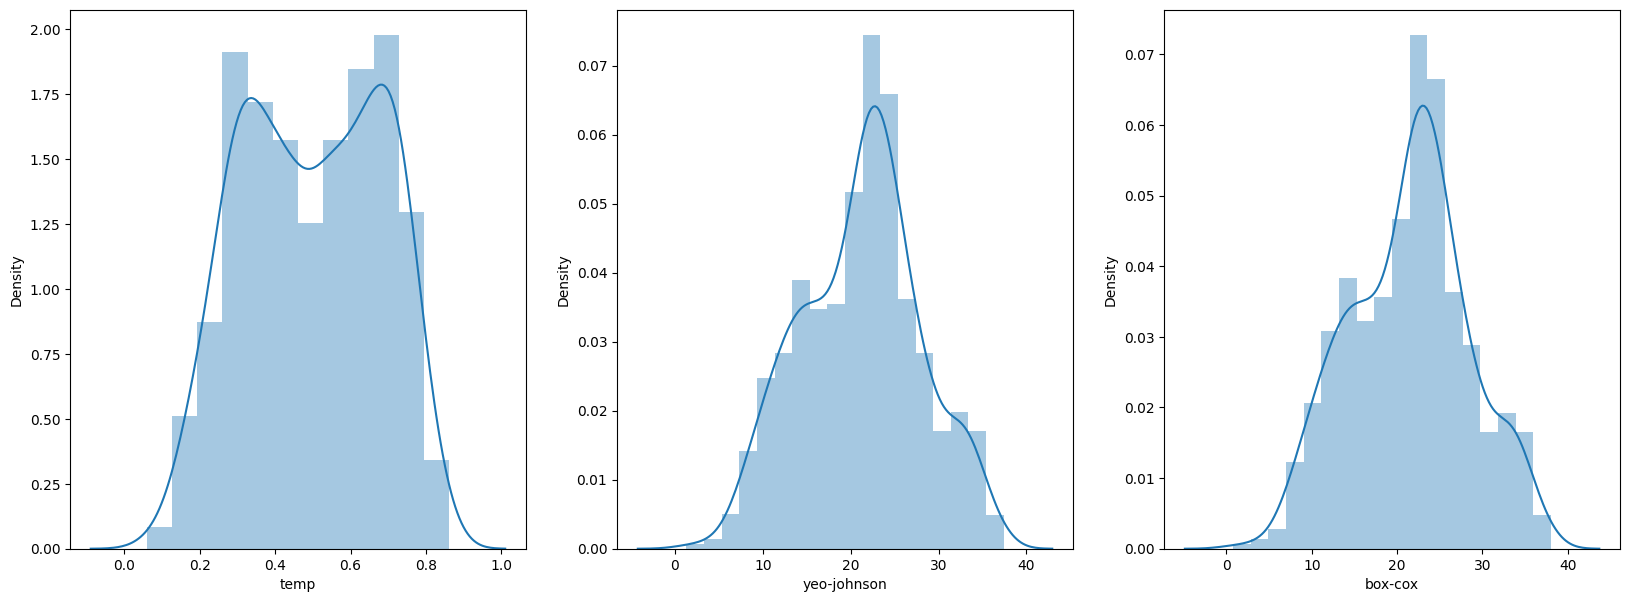

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(20,7))
sns.distplot(df_bs_sp['temp'], ax= axs[0])
sns.distplot(df_bs_sp['yeo-johnson'], ax= axs[1])
sns.distplot(df_bs_sp['box-cox'], ax= axs[2])

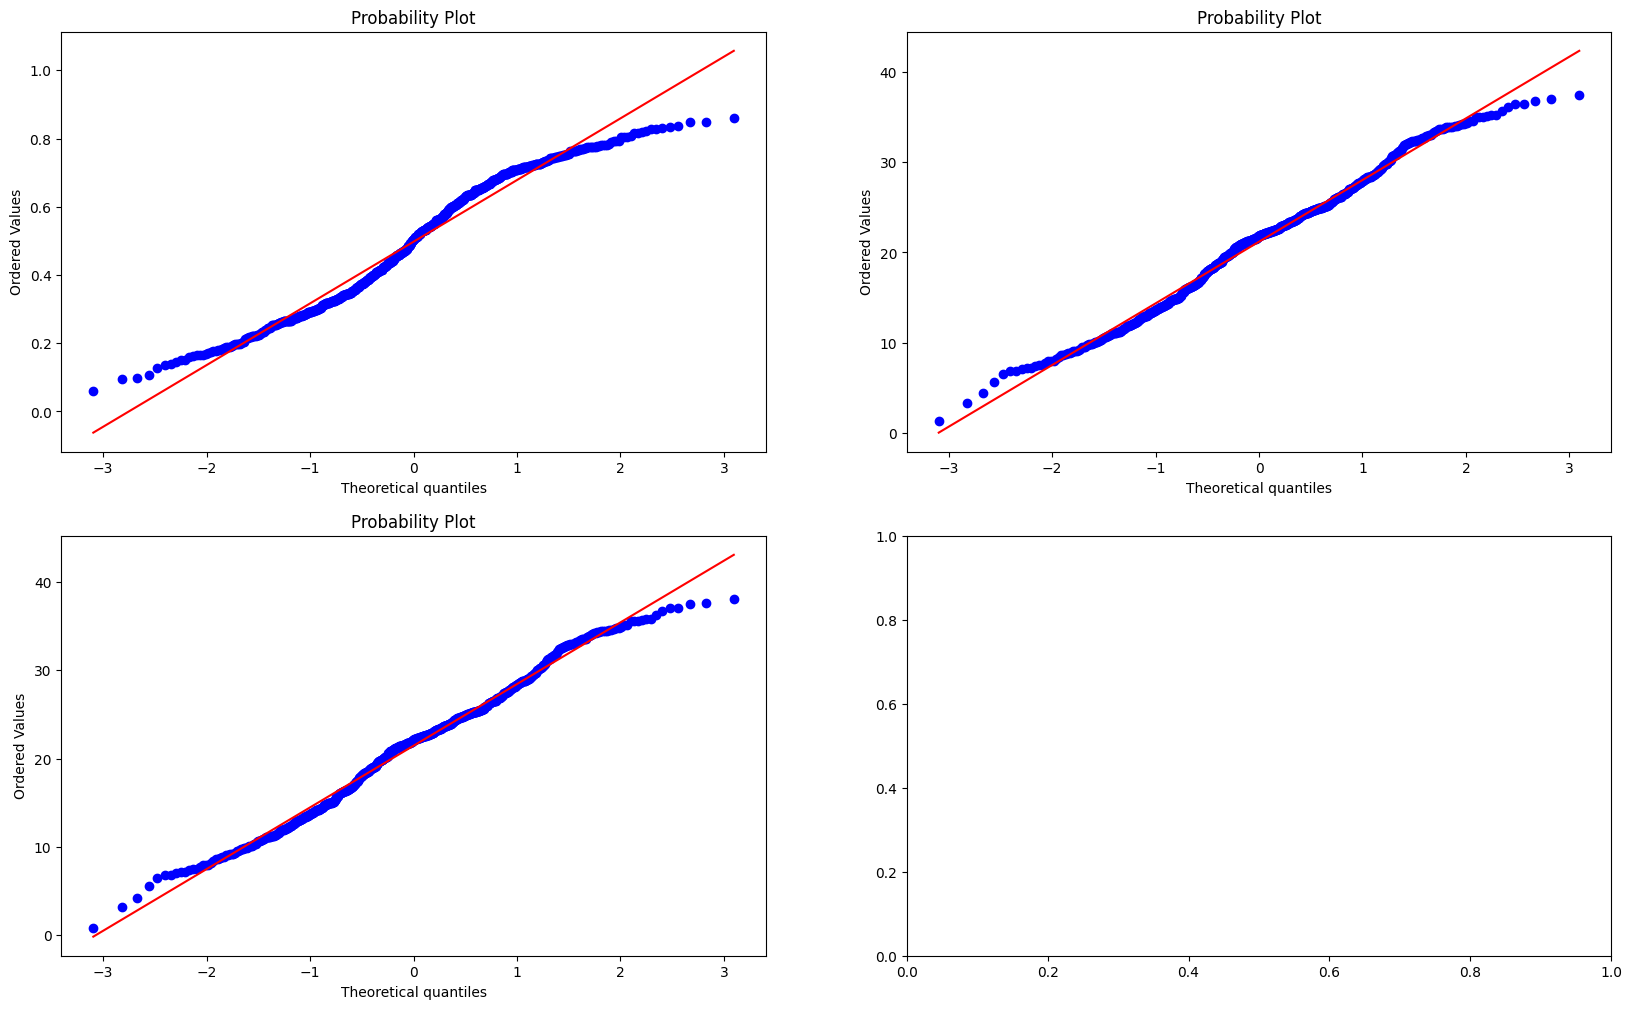

In [15]:
import scipy.stats as stats

fig, axs = plt.subplots(2,2, figsize=(20,12))
stats.probplot(df_bs_sp['temp'], dist=stats.norm, plot= axs[0,0])
stats.probplot(df_bs_sp['yeo-johnson'],dist=stats.norm, plot= axs[0,1])
stats.probplot(df_bs_sp['box-cox'], dist=stats.norm, plot= axs[1,0])
plt.show()

In [16]:
from scipy.stats import shapiro

normal_columns = []
p_values = []

for column in ['temp', 'yeo-johnson','box-cox']:
    # Shapiro 검정 수행
    stat, p = shapiro(df_bs_sp[column])

    p_values.append(p)
    normal_columns.append(column)

sorted_columns = [col for _, col in sorted(zip(p_values, normal_columns))]

print("정규분포에 먼 순서대로 정렬\n->", sorted_columns)

정규분포에 먼 순서대로 정렬
-> ['temp', 'yeo-johnson', 'box-cox']


### Yeo-Johnson 변환 후 성능 확인

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
df_X = np.array(df_bs_sp[['casual','yeo-johnson']])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_sp['cnt'], test_size=0.3, random_state=111)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
rmse_yj = sqrt(mean_squared_error(y_test, y_pred))
rmse_yj

1251.6806571419918

In [20]:
df_yj = df_bs_sp[['casual','cnt','yeo-johnson']]
df_yj.corr()

,casual,cnt,yeo-johnson
casual,1.000000,0.671737,0.940128
cnt,0.671737,1.000000,0.758077
yeo-johnson,0.940128,0.758077,1.000000


In [21]:
X_yj = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs_sp['cnt'], X_yj).fit()
summary_yj = model_ols.summary()
summary_yj

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     502.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.05e-136
Time:                        05:51:38   Log-Likelihood:                -6013.0
No. Observations:                 704   AIC:                         1.203e+04
Df Residuals:                     701   BIC:                         1.205e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1174.1848    275.157     -4.267      0.000   -1714.415    -633.955
x1            -1.0006      0.202     -4.963      0.000      -1.396      -0.605
x2           308.2441     20.097     15.338      0.000     268.787     347.701
==============================================================================
Omnibus:                       17.821   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.587
Skew:                          -0.058   Prob(JB):                      0.00828
Kurtosis:                       2.440   Cond. No.                     6.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### box-cox 변환 후 성능 확인

In [22]:
df_X = np.array(df_bs_sp[['casual','box-cox']])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_sp['cnt'], test_size=0.3, random_state=111)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
rmse_bc = sqrt(mean_squared_error(y_test, y_pred))
rmse_bc

1251.7763925143204

In [24]:
df_bc = df_bs_sp[['casual','cnt','box-cox']]
df_bc.corr()

,casual,cnt,box-cox
casual,1.000000,0.671737,0.940228
cnt,0.671737,1.000000,0.757985
box-cox,0.940228,0.757985,1.000000


In [25]:
X_bc = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs_sp['cnt'], X_bc).fit()
summary_bc = model_ols.summary()
summary_bc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     502.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.50e-136
Time:                        05:51:58   Log-Likelihood:                -6013.1
No. Observations:                 704   AIC:                         1.203e+04
Df Residuals:                     701   BIC:                         1.205e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1117.9871    271.787     -4.113      0.000   -1651.601    -584.373
x1            -1.0020      0.202     -4.965      0.000      -1.398      -0.606
x2           301.7637     19.686     15.329      0.000     263.113     340.415
==============================================================================
Omnibus:                       17.913   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.612
Skew:                          -0.057   Prob(JB):                      0.00818
Kurtosis:                       2.439   Cond. No.                     6.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
### 성능 비교

**RMSE** (0에 가까울수록 정확한 예측)
- temp:`1295.64`
- yeo-johnson: `1251.68`
- box-cox: `1251.78`

**Corr** (1에 가까울수록 정확한 예측)
- temp: `0.625058`
- yeo-johnson: `0.758077`
- box-cox: `0.757985`

**R-squared** (1에 가까울수록 정확한 예측)
- temp: `0.549`
- yeo-johnson: `0.589`
- box-cox: `0.589`

**정확도: yeo-johnson > box-cox > 원본**
- 그러나, shapiro 검정에 따르면 정규분포에 더 가까웠던 건 box-cox
- 정규분포 변환이 어느정도 모델의 성능에 도움이 될 수 있지만, 정규분포에 가까울수록 성능이 좋아지는 건 X